# RNA correlated compartment

In [2]:
import numpy as np
import pandas as pd
import cooler
import anndata
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm as cm
import seaborn as sns

mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'


In [3]:
indir = f'/home/jzhou_salk_edu/sky_workdir/hba/compartment_majortype/diff/neu/'
outdir = '/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/'

In [5]:
# no L5ET
leg = ['L23_IT', 'L4_IT', 'L5_IT', 'L6_IT', 'L6_IT_Car3', 'L56_NP', 'L6_CT', 'L6b', 'Amy', 
       'Lamp5', 'Lamp5_LHX6', 'Sncg', 'Vip', 'Pvalb', 'Pvalb_ChC', 'Sst', 'CHD7', 
       'MSN_D1', 'MSN_D2', 'Foxp2', 'SubCtx', 
       # 'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC'
      ]
res = 100000


In [6]:
comp = pd.read_csv(f'{indir}DifferentialResult/fdr_result/differential.intra_sample_combined.pcQnm.bedGraph', sep='\t', header=0, index_col=None)
comp.index = comp['chr'] + '_' + (comp['start'] // res).astype(str)
comp

,chr,start,end,L23_IT_100Kb,L4_IT_100Kb,L5_IT_100Kb,L6_IT_100Kb,L6_IT_Car3_100Kb,L56_NP_100Kb,L6_CT_100Kb,...,Sst,CHD7,MSN_D1,MSN_D2,Foxp2,SubCtx,sample_maha,pval,padj,dist_clust
chr10_2,chr10,200000,300000,1.20141,1.40148,1.12274,0.91856,0.71971,1.45364,1.35924,...,1.60003,1.79399,1.18581,1.14140,1.64998,1.77294,78.797991,6.274326e-09,1.654675e-08,1
chr10_3,chr10,300000,400000,1.67618,1.43001,1.33450,1.32691,0.51945,1.22911,1.53759,...,1.69831,1.69831,1.61143,1.15231,1.94190,2.06830,101.685104,6.282661e-13,1.940153e-12,1
chr10_4,chr10,400000,500000,1.27442,1.33094,1.21215,1.43974,0.96214,1.59233,1.40148,...,1.58100,1.61143,1.64171,1.62984,1.69065,1.68152,28.864611,9.045962e-02,1.563036e-01,1
chr10_5,chr10,500000,600000,1.43001,1.39806,1.69428,1.60003,0.57439,1.61143,1.37993,...,1.76052,1.79952,1.58100,1.83248,1.55484,2.17604,110.773702,1.418987e-14,4.640257e-14,1
chr10_6,chr10,600000,700000,1.43350,1.69065,1.44978,1.66232,1.23573,1.26750,1.73916,...,1.90078,1.82624,1.85399,1.42406,1.60286,1.35578,8.253318,9.900547e-01,1.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9_1367,chr9,136700000,136800000,2.53781,2.49765,2.43707,2.53781,2.64364,2.50284,2.61332,...,2.49765,2.30178,2.55214,2.61332,2.42730,2.37386,0.208439,1.000000e+00,1.000000e+00,1
chr9_1368,chr9,136800000,136900000,2.25818,2.34290,2.30178,2.27476,2.20722,2.28698,2.49765,...,2.35196,2.29048,2.25515,2.25515,2.17299,2.22961,1.756256,1.000000e+00,1.000000e+00,1
chr9_1369,chr9,136900000,137000000,2.26494,2.13128,2.34837,2.37084,2.33576,2.35196,2.46547,...,2.39138,2.22605,2.35521,2.31751,2.40634,2.33914,0.318975,1.000000e+00,1.000000e+00,1
chr9_1370,chr9,137000000,137100000,2.35196,2.04449,2.36778,2.18888,2.30471,2.28174,2.42333,...,2.35761,2.25818,2.30178,2.18888,2.30759,2.36778,0.952000,1.000000e+00,1.000000e+00,1


In [7]:
binall = comp[['chr', 'start', 'end', 'sample_maha', 'pval', 'padj']]
binall = binall.rename({'chr':'chrom'}, axis=1)
comp = comp[leg]


In [8]:
expr = pd.read_hdf('/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/cluster_expr.hdf').loc[leg]


In [10]:
from scipy.stats import rankdata

deg = np.zeros(expr.shape[1])
for i in range(len(leg)-1):
    for j in range(i+1, len(leg)):
        tmp = np.load(f'/home/jzhou_salk_edu/sky_workdir/hba/rna_majortype/DEG/{leg[i]}-{leg[j]}.npz')
        # deg[np.logical_and(np.abs(tmp['fc'])>1, tmp['fdr']<1e-3)] = 1
        rank = rankdata(tmp['fdr'])
        deg[rank<=100] = 1

print(deg.sum())


1131.0


In [11]:
chrom_size_path = f'/data/hba/loop_majortype/hg38_with_chrl.main.chrom.sizes'
chrom_sizes = cooler.read_chromsizes(chrom_size_path, all_names=True)


In [12]:
gene_meta = pd.read_csv('/home/jzhou_salk_edu/sky_workdir/hba/ref/gencode.v33.bed', sep='\t', index_col=None, header=None)
gene_meta.columns = ['chrom', 'start', 'end', 'gene_id', 'gene_name', 'strand']
gene_meta = gene_meta.set_index('gene_id').loc[expr.columns[deg==1]]
gene_meta = gene_meta.loc[gene_meta['chrom'].isin(chrom_sizes.index[:22])]
gene_meta

,chrom,start,end,gene_name,strand
gene,,,,,
ENSG00000002746.15,chr7,43112629,43566001,HECW1,+
ENSG00000005108.16,chr7,11370365,11832198,THSD7A,-
ENSG00000006128.12,chr7,97732084,97740472,TAC1,+
ENSG00000006468.14,chr7,13891229,13991425,ETV1,-
ENSG00000007237.18,chr17,9910609,10198551,AC005747.1,-
...,...,...,...,...,...
ENSG00000286954.1,chr6,22663507,22675493,AL033539.2,+
ENSG00000287172.1,chr2,76185020,76399490,AC073091.3,+
ENSG00000287694.1,chr16,76277288,76819624,AC106741.2,+


In [13]:
import joblib
# from qnorm import quantile_normalize
from scipy.stats import norm
from statsmodels.sandbox.stats.multicomp import multipletests as FDR
from tqdm import tqdm
from ALLCools.mcds.correlation import corr_array


In [14]:
def shuffle_corr_norm(rna_data, dmr_data):
    
    shuffle_rna_data = rna_data.copy()
    for col, data in shuffle_rna_data.items():
        n_gene = shuffle_rna_data.shape[0]
        shuffle_rna_data[col] = shuffle_rna_data[col].sample(n_gene).values
    
    if dmr_data.shape[0] > 50000:
        shuffle_dmr_data = dmr_data.sample(50000).copy()
    else:
        shuffle_dmr_data = dmr_data.copy()
    for col, data in shuffle_dmr_data.items():
        n_dmr = shuffle_dmr_data.shape[0]
        shuffle_dmr_data[col] = shuffle_dmr_data[col].sample(n_dmr).values

    # shuffle corr
    shuffle_corr = corr_array(shuffle_rna_data, shuffle_dmr_data)
    mu, std = norm.fit(shuffle_corr.ravel())
    return mu, std, shuffle_corr.ravel()


In [15]:
null_mu, null_std, shuffle_corr = shuffle_corr_norm(expr.loc[:,  expr.columns.isin(gene_meta.index)].T, comp)
null_mu, null_std


(3.360401866366818e-06, 0.22354448644380281)

In [16]:
shuffle_corr.shape

(27194755,)

In [17]:
gene_slop = 5000000


In [18]:
binall['pos'] = binall[['start', 'end']].mean(axis=1)

In [19]:
gene_records = []
for gene, row in tqdm(gene_meta.iterrows(), total=gene_meta.shape[0]):
    gene_rna = expr[[gene]].T
    
    dmr_chrom = row['chrom']
    dmr_start = row['start'] - gene_slop
    dmr_end = row['end'] + gene_slop
    sel_dmr = (binall['chrom']==dmr_chrom) & (binall['pos'] > dmr_start) & (binall['pos'] < dmr_end)
    gene_dmr = comp.loc[sel_dmr]

    gene_corr = corr_array(gene_rna, gene_dmr).ravel()
    gene_corr = pd.Series(gene_corr, index=gene_dmr.index)

    # pvalue = norm.sf(gene_corr.values, null_mu, null_std)
    # pvalue[pvalue > 0.5] = 1 - pvalue[pvalue > 0.5]
    # pvalue *= 2  # two tailed
    # perform multi-test correction and  q-value
    # _, q, *_ = fdrcorrection(pvalue)

    gene_corr.name = 'corr'
    gene_corr = gene_corr.reset_index()
    gene_corr['gene'] = gene
    # gene_corr["q"] = q
    
    # minimum filter
    # gene_corr = gene_corr[
    #     (gene_corr["q"] < min_q) & (gene_corr["corr"].abs() > min_corr)
    # ].set_index("dmr")

    # gene_records[gene] = gene_corr
    gene_records.append(gene_corr)
    

100%|██████████| 1099/1099 [00:03<00:00, 293.25it/s]


In [20]:
gene_records = pd.concat(gene_records, axis=0)
gene_records.index = np.arange(gene_records.shape[0])
gene_records

,index,corr,gene
0,chr7_381,0.216611,ENSG00000002746.15
1,chr7_382,0.309620,ENSG00000002746.15
2,chr7_383,0.413378,ENSG00000002746.15
3,chr7_384,0.452824,ENSG00000002746.15
4,chr7_385,0.422503,ENSG00000002746.15
...,...,...,...
105394,chr11_859,0.110637,ENSG00000287912.1
105395,chr11_860,0.011490,ENSG00000287912.1
105396,chr11_861,0.264604,ENSG00000287912.1
105397,chr11_862,0.210742,ENSG00000287912.1


<AxesSubplot:ylabel='Density'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


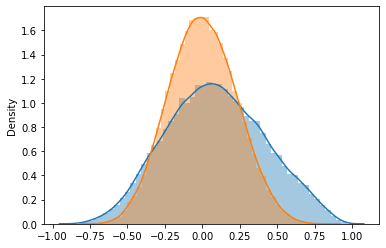

In [21]:
fig, ax = plt.subplots()
sns.distplot(np.random.choice(gene_records['corr'], 50000), ax=ax)
sns.distplot(np.random.choice(shuffle_corr, 50000), ax=ax)

In [22]:
t1 = rankdata(np.concatenate((gene_records['corr'].values, shuffle_corr)))[:gene_records.shape[0]]
t2 = rankdata(gene_records['corr'].values)


In [23]:
gene_records['FDRneg'] = (t1 - t2) / len(shuffle_corr) / t2 * gene_records.shape[0]
gene_records['FDRpos'] = (len(shuffle_corr) - t1 + t2) / len(shuffle_corr) / (gene_records.shape[0] - t2) * gene_records.shape[0]


In [24]:
threspos = gene_records.loc[gene_records['FDRpos']<0.1, 'corr'].min()
thresneg = gene_records.loc[gene_records['FDRneg']<0.1, 'corr'].max()
print(threspos, thresneg)


0.5029179099915155 -0.6172767127895147


In [25]:
gene_meta[['TSS', 'TES']] = gene_meta[['start', 'end']]
selg = (gene_meta['strand']=='-')
gene_meta.loc[selg, ['TSS', 'TES']] = gene_meta.loc[selg, ['TES', 'TSS']].values


In [26]:
gene_records['TSSdist'] = binall.loc[gene_records['index'], 'pos'].values - gene_meta.loc[gene_records['gene'], 'TSS'].values
selg = (gene_meta.loc[gene_records['gene'], 'strand']=='-')
gene_records.loc[selg.values, 'TSSdist'] = -gene_records.loc[selg.values, 'TSSdist'].values

gene_records['TESdist'] = binall.loc[gene_records['index'], 'pos'].values - gene_meta.loc[gene_records['gene'], 'TES'].values
selg = (gene_meta.loc[gene_records['gene'], 'strand']=='-')
gene_records.loc[selg.values, 'TESdist'] = -gene_records.loc[selg.values, 'TESdist'].values


In [27]:
gene_records['coord'] = 0
selp = (gene_records['TSSdist']<=0)
gene_records.loc[selp, 'coord'] = gene_records.loc[selp, 'TSSdist'] / res * 4 - 100

selp = (gene_records['TESdist']>=0)
gene_records.loc[selp, 'coord'] = gene_records.loc[selp, 'TESdist'] / res * 4 + 100

selp = (gene_records['TESdist']<0) & (gene_records['TSSdist']>0)
gene_records.loc[selp, 'coord'] = gene_records.loc[selp, 'TSSdist'] / (gene_records.loc[selp, 'TSSdist'] - gene_records.loc[selp, 'TESdist']) * 200 - 100


In [28]:
gene_records.to_hdf(f'{outdir}DEG_neu_comp_5M_corr.hdf', key='data')

In [5]:
gene_records = pd.read_hdf(f'{outdir}DEG_neu_comp_5M_corr.hdf', key='data')

In [29]:
thres = np.max(np.abs([thresneg, threspos]))
gene_records['group'] = gene_records['coord']//2
proppos = (gene_records.loc[gene_records['corr']>thres, 'group'].value_counts() / gene_records['group'].value_counts()).sort_index().fillna(0)
propneg = (gene_records.loc[gene_records['corr']<-thres, 'group'].value_counts() / gene_records['group'].value_counts()).sort_index().fillna(0)


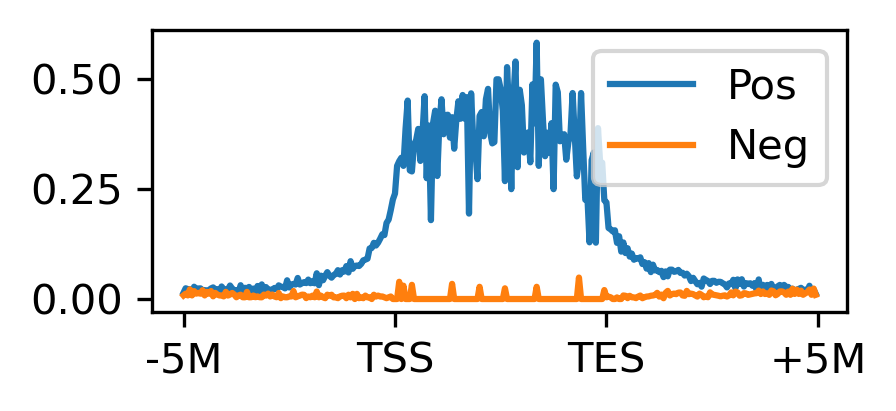

In [30]:
fig, ax = plt.subplots(figsize=(3, 1.5), dpi=300)
ax.plot(np.arange(300), proppos, c='C0', label='Pos')
ax.plot(np.arange(300), propneg, c='C1', label='Neg')
ax.set_xticks([0, 100, 200, 300])
ax.set_xticklabels(['-5M', 'TSS', 'TES', '+5M'])
ax.legend()
plt.tight_layout()
# plt.savefig('proportion_corr_comp.pdf', transparent=True)


In [31]:
tmp = gene_records.loc[(gene_records['corr']>thres) & (gene_records['TSSdist']>-res) & (gene_records['TESdist']<res), 'gene'].unique()
print(tmp.shape[0], tmp.shape[0]/gene_records['gene'].unique().shape[0])
np.savetxt(f'{outdir}gene_compposcorr_genebody.csv.gz', tmp, delimiter='\n', fmt='%s')

tmp = gene_records.loc[(gene_records['corr']<-thres) & (gene_records['TSSdist']>-res) & (gene_records['TESdist']<res), 'gene'].unique()
print(tmp.shape[0], tmp.shape[0]/gene_records['gene'].unique().shape[0])

tmp = gene_records.loc[(gene_records['corr'].abs()>thres) & (gene_records['TSSdist']>-res) & (gene_records['TESdist']<res), 'gene'].unique()
print(tmp.shape[0], tmp.shape[0]/gene_records['gene'].unique().shape[0])


450 0.4094631483166515
12 0.01091901728844404
462 0.42038216560509556


[Text(-300, 0, '-5M'),
 Text(-100, 0, 'TSS'),
 Text(100, 0, 'TES'),
 Text(300, 0, '+5M')]

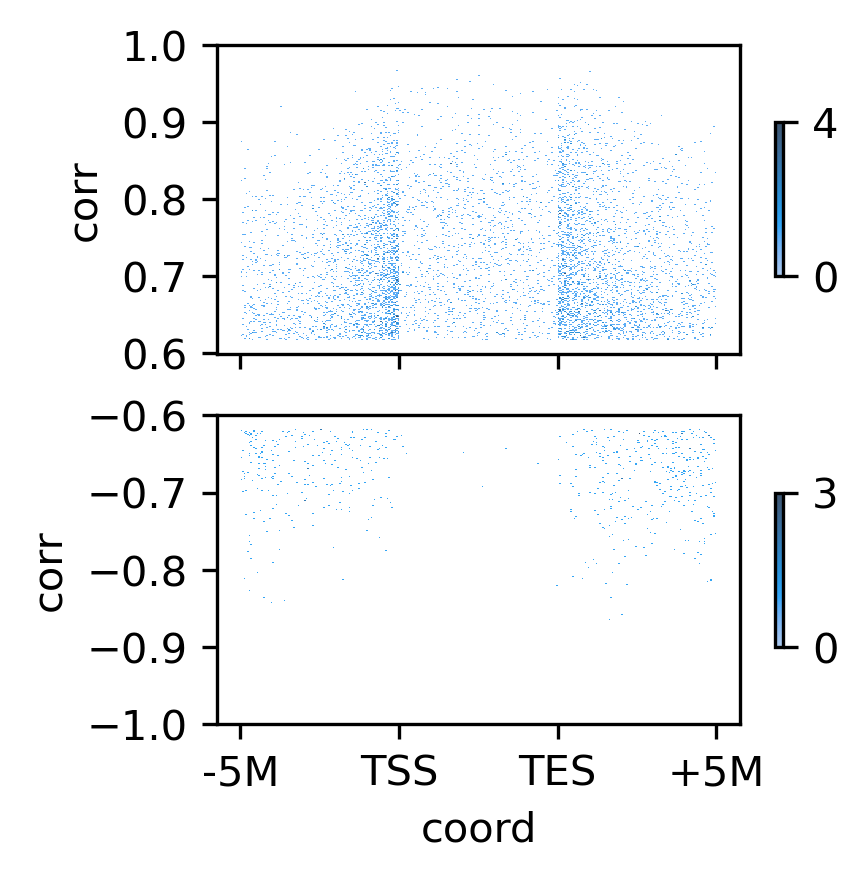

In [33]:
fig, axes = plt.subplots(2, 1, sharex='all', figsize=(3,3), dpi=300)
ax = axes[0]
tmp = gene_records.loc[gene_records['corr']>thres]
sns.histplot(data=tmp, x='coord', y='corr', bins=300, ax=ax, cbar=True, cbar_kws=dict(ticks=[0,4], fraction=0.2, shrink=0.5))
ax.set_yticks(np.arange(0.6, 1.05, 0.1))

ax = axes[1]
tmp = gene_records.loc[gene_records['corr']<-thres]
# tmp = gene_records.loc[gene_records['corr']<-threspos]
sns.histplot(data=tmp, x='coord', y='corr', bins=300, ax=ax, cbar=True, cbar_kws=dict(ticks=[0,3], fraction=0.2, shrink=0.5))
# ax.set_yticks([-0.6, -0.7, -0.8, -0.9])
ax.set_yticks(np.arange(-1.0, -0.55, 0.1))

ax.set_xticks([-300, -100, 100, 300])
ax.set_xticklabels(['-5M', 'TSS', 'TES', '+5M'])

# plt.savefig('DEG_comp_sigcorr.pdf', transparent=True)
